In [123]:
#Import Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel (r'C:\Users\Life\Desktop\GMU\CS-504\dataset\AccidentData_2016_2019_cleaned.xlsx')
data

,STATE,COUNTY,MONTH,DAY,HOUR,MINUTE,VE_FORMS,PERSONS,PEDS,NHS,...,TYP_INT,WRK_ZONE,WEATHER1,WEATHER2,PVH_INVL,PERNOTMVIT,PERMVIT,RUR_URB,FUNC_SYS,RD_OWNER
0,1,73,1,1,9,25,1,1,0,1,...,1,0,1,0,0,0,1,2,1,1
1,1,73,1,10,19,59,1,2,0,1,...,1,0,1,0,0,0,2,2,1,1
2,1,73,1,1,2,20,1,2,0,1,...,1,0,10,0,1,1,1,2,1,1
3,1,73,1,17,21,45,1,1,0,1,...,1,0,1,0,0,0,1,2,1,1
4,1,73,1,26,20,7,1,1,0,1,...,1,0,2,0,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192509,36,15,7,3,18,35,2,4,0,0,...,2,0,1,0,0,0,4,2,3,1
192510,36,27,7,12,23,2,2,3,0,0,...,2,0,10,0,0,0,3,1,7,3
192511,36,55,7,10,5,14,2,4,0,0,...,1,0,1,0,0,0,4,2,7,4
192512,36,59,7,12,10,12,2,3,0,0,...,1,0,1,0,0,0,3,2,7,3


   VE_TOTAL  counts
0         1  106621
1         2   69813
2         3   11708
3         4    2744
4         5     967
5         6     356
6         7     167
7         8      69
8         9      47
9        10      22


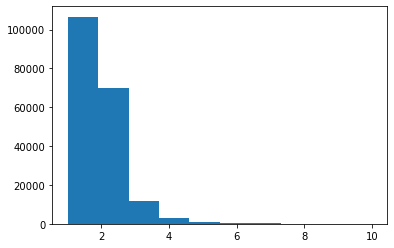

In [124]:
# Analysis on VE_TOTAL column
print(data.groupby(['VE_TOTAL']).size().reset_index(name='counts'))
plt.hist(data['VE_TOTAL'])
plt.show()

    PERSONS  counts
0         0     201
1         1   80194
2         2   53496
3         3   27999
4         4   14028
5         5    7554
6         6    4039
7         7    2151
8         8    1173
9         9     649
10       10     424
11       11     210
12       12     148
13       13      78
14       14      39
15       15      43
16       16      38
17       17      37
18       18      13


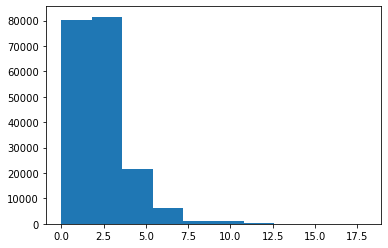

In [125]:
# Anlaysis on PERSONS
print(data.groupby(['PERSONS']).size().reset_index(name='counts'))
plt.hist(data['PERSONS'])
plt.show()

   FATALS  counts
0       1  179099
1       2   11186
2       3    1681
3       4     420
4       5     101
5       6      27


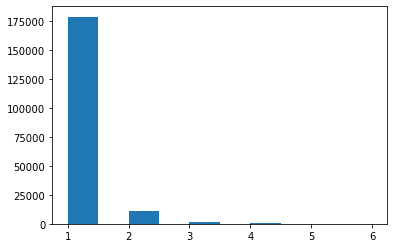

In [126]:
print(data.groupby(['FATALS']).size().reset_index(name='counts'))
plt.hist(data['FATALS'])
plt.show()

In [127]:
#Normalize Latitude/Longitude columns because they contain negative values
data['LATITUDE'] = 100 * (data['LATITUDE'] - data['LATITUDE'].min()) / (data['LATITUDE'].max() - data['LATITUDE'].min())
data['LONGITUD'] = 100 * (data['LONGITUD'] - data['LONGITUD'].min()) / (data['LONGITUD'].max() - data['LONGITUD'].min())
#Drop NaN/null values
#with pd.option_context('mode.use_inf_as_null', True):
#   data = data.dropna()
data[['LATITUDE', 'LONGITUD']]

,LATITUDE,LONGITUD
0,17.774822,7.442017
1,17.742521,7.444785
2,18.049986,7.460112
3,17.779142,7.441806
4,17.757026,7.443222
...,...,...
192509,28.431234,8.293631
192510,27.963858,8.545833
192511,29.883063,8.224953
192512,26.757247,8.568810


In [128]:
#Analysis on columns VE_TOTAL, PERSONS, FATALS used to derive Severity
data[["VE_TOTAL", "PERSONS", "FATALS"]].describe()

,VE_TOTAL,PERSONS,FATALS
count,192514.000000,192514.000000,192514.000000
mean,1.567065,2.241827,1.084913
std,0.782877,1.635003,0.342575
min,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,2.000000,1.000000
75%,2.000000,3.000000,1.000000
max,10.000000,18.000000,6.000000


In [129]:
#Normalize columns VE_TOTAL, PERSONS, FATALS based on mean & STD by calculating z-scores
# Derive column SUM_NORM by summing normalized values of VE_TOTAL, PERSONS, FATALS
VE_TOTAL_MEAN = data["VE_TOTAL"].mean()
VE_TOTAL_SD = data["VE_TOTAL"].std()
PERSONS_MEAN = data["PERSONS"].mean()
PERSONS_SD = data["PERSONS"].std()
FATALS_MEAN = data["FATALS"].mean()
FATALS_SD = data["FATALS"].std()

data["VE_TOTAL_NORM"] = round((data["VE_TOTAL"]-VE_TOTAL_MEAN)/VE_TOTAL_SD, 4)
data["PERSONS_NORM"] = round((data["PERSONS"]-PERSONS_MEAN)/PERSONS_SD, 4)
data["FATALS_NORM"] = round((data["FATALS"]-FATALS_MEAN)/FATALS_SD, 4)
data["SUM_NORM"] = data["VE_TOTAL_NORM"] + data["PERSONS_NORM"] + data["FATALS_NORM"]

df = data[["VE_TOTAL", "VE_TOTAL_NORM", "PERSONS", "PERSONS_NORM", "FATALS", "FATALS_NORM", "SUM_NORM"]]
df
df.describe()


,VE_TOTAL,VE_TOTAL_NORM,PERSONS,PERSONS_NORM,FATALS,FATALS_NORM,SUM_NORM
count,192514.000000,192514.000000,192514.000000,192514.000000,192514.000000,192514.000000,192514.000000
mean,1.567065,0.000015,2.241827,0.000010,1.084913,-0.000030,-0.000004
std,0.782877,0.999981,1.635003,0.999993,0.342575,1.000009,2.262248
min,1.000000,-0.724300,0.000000,-1.371100,1.000000,-0.247900,-2.343300
25%,1.000000,-0.724300,1.000000,-0.759500,1.000000,-0.247900,-1.731700
50%,1.000000,-0.724300,2.000000,-0.147900,1.000000,-0.247900,-0.508500
75%,2.000000,0.553000,3.000000,0.463700,1.000000,-0.247900,0.768800
max,10.000000,10.771700,18.000000,9.638000,6.000000,14.347500,27.695800


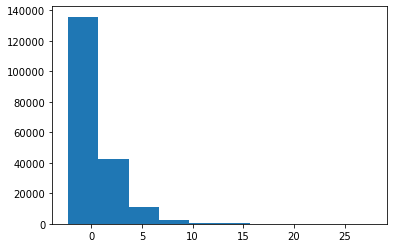

In [130]:
# Histogram - distribution of Normalized Sum
plt.hist(df['SUM_NORM'])
plt.show()

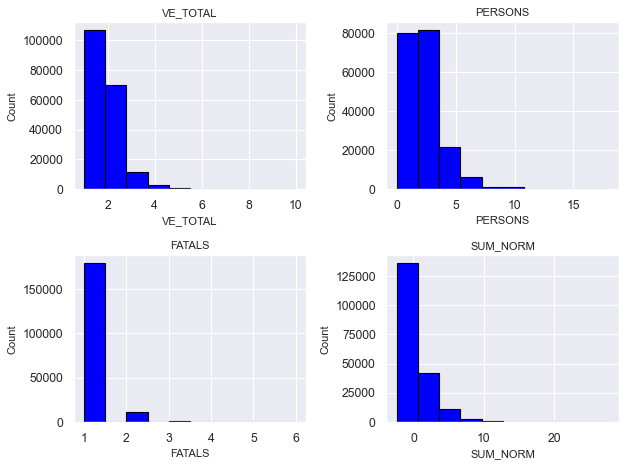

In [137]:
from matplotlib.pyplot import figure
#g = sns.FacetGrid(df[['VE_TOTAL', 'PERSONS', 'FATALS', 'SUM_NORM']], col='cols', hue="target", palette="Set1")
#g = (g.map(sns.distplot, "vals", hist=False, rug=True))
#sns.plt.show()
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
#sns.set(style="darkgrid")

#fig, axs = plt.subplots(2, 2, figsize=(7, 7))

figure(figsize=(8, 6), dpi=80)

ax = plt.subplot(2, 2, 1)
# Draw the plot
ax.hist(df['VE_TOTAL'],color = 'blue', edgecolor = 'black')
ax.set_title('VE_TOTAL', size = 10)
ax.set_xlabel('VE_TOTAL', size = 10)
ax.set_ylabel('Count', size= 10)

ax = plt.subplot(2, 2, 2)
# Draw the plot
ax.hist(df['PERSONS'],color = 'blue', edgecolor = 'black')
ax.set_title('PERSONS', size = 10)
ax.set_xlabel('PERSONS', size = 10)
ax.set_ylabel('Count', size= 10)

ax = plt.subplot(2, 2, 3)
# Draw the plot
ax.hist(df['FATALS'],color = 'blue', edgecolor = 'black')
ax.set_title('FATALS', size = 10)
ax.set_xlabel('FATALS', size = 10)
ax.set_ylabel('Count', size= 10)

ax = plt.subplot(2, 2, 4)
# Draw the plot
ax.hist(df['SUM_NORM'],color = 'blue', edgecolor = 'black')
ax.set_title('SUM_NORM', size = 10)
ax.set_xlabel('SUM_NORM', size = 10)
ax.set_ylabel('Count', size= 10)

plt.tight_layout()

#sns.histplot(data=df[['VE_TOTAL', 'PERSONS', 'FATALS', 'SUM_NORM']], x="VE_TOTAL", kde=True, color="skyblue", ax=axs[0, 0])
#sns.histplot(data=df[['VE_TOTAL', 'PERSONS', 'FATALS', 'SUM_NORM']], x="PERSONS", kde=True, color="olive", ax=axs[0, 1])
#sns.histplot(data=df[['VE_TOTAL', 'PERSONS', 'FATALS', 'SUM_NORM']], x="FATALS", kde=True, color="gold", ax=axs[1, 0])
#sns.histplot(data=df[['VE_TOTAL', 'PERSONS', 'FATALS', 'SUM_NORM']], x="SUM_NORM", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [70]:
#Define dependent variable 'SEVERITY' from derived summation value of above 3 normalized variables
conditions = [
    (data['SUM_NORM'] <= data["SUM_NORM"].describe().loc['25%']),
    (data['SUM_NORM'] > data["SUM_NORM"].describe().loc['25%']) 
        & (data['SUM_NORM'] <= data["SUM_NORM"].describe().loc['75%']),
    (data['SUM_NORM'] > data["SUM_NORM"].describe().loc['75%'])
    ]
#values = ['Low', 'Medium', 'High'] # create a list of the values we want to assign for each condition
values = [1, 2, 3] # create a list of the values we want to assign for each condition
# create a new column and use np.select to assign values to it using our lists as arguments
data['SEVERITY'] = np.select(conditions, values)

print('Dataframe size after adding SEVERITY column : '+ str(data.shape))
print('Dataframe Columns after adding SEVERITY column : '+ str(data.columns))

data.drop('VE_TOTAL', inplace=True, axis=1)
data.drop('PERSONS', inplace=True, axis=1)
data.drop('FATALS', inplace=True, axis=1)
data.drop('PERMVIT', inplace=True, axis=1)
data.drop('VE_FORMS', inplace=True, axis=1)

print('Dataframe size after dropping 5 columns : '+ str(data.shape))
print('Dataframe Columns after dropping 5 columns : '+ str(data.columns))

data.head(20)

Dataframe size after adding SEVERITY column : (192514, 54)
Dataframe Columns after adding SEVERITY column : Index(['STATE', 'COUNTY', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'VE_FORMS',
       'PERSONS', 'PEDS', 'NHS', 'ROUTE', 'SP_JUR', 'HARM_EV', 'MAN_COLL',
       'REL_ROAD', 'LGT_COND', 'WEATHER', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'SCH_BUS', 'CF1', 'CF2', 'CF3',
       'FATALS', 'DAY_WEEK', 'DRUNK_DR', 'ST_CASE', 'CITY', 'MILEPT', 'YEAR',
       'LATITUDE', 'LONGITUD', 'VE_TOTAL', 'RELJCT1', 'RELJCT2', 'TYP_INT',
       'WRK_ZONE', 'WEATHER1', 'WEATHER2', 'PVH_INVL', 'PERNOTMVIT', 'PERMVIT',
       'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'VE_TOTAL_NORM', 'PERSONS_NORM',
       'FATALS_NORM', 'SUM_NORM', 'SEVERITY'],
      dtype='object')
Dataframe size after dropping 5 columns : (192514, 49)
Dataframe Columns after dropping 5 columns : Index(['STATE', 'COUNTY', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'PEDS', 'NHS',
       'ROUTE', 'SP_JUR', 'HARM_EV', 'MAN_C

,STATE,COUNTY,MONTH,DAY,HOUR,MINUTE,PEDS,NHS,ROUTE,SP_JUR,...,PVH_INVL,PERNOTMVIT,RUR_URB,FUNC_SYS,RD_OWNER,VE_TOTAL_NORM,PERSONS_NORM,FATALS_NORM,SUM_NORM,SEVERITY
0,1,73,1,1,9,25,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.7595,-0.2479,-1.7317,1
1,1,73,1,10,19,59,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.1479,-0.2479,-1.1201,2
2,1,73,1,1,2,20,0,1,1,0,...,1,1,2,1,1,0.5530,-0.1479,-0.2479,0.1572,2
3,1,73,1,17,21,45,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.7595,-0.2479,-1.7317,1
4,1,73,1,26,20,7,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.7595,-0.2479,-1.7317,1
5,1,109,1,1,1,10,0,0,3,0,...,0,0,1,4,1,-0.7243,-0.7595,-0.2479,-1.7317,1
6,1,117,1,1,23,34,0,0,4,0,...,0,0,1,4,2,-0.7243,-0.7595,-0.2479,-1.7317,1
7,1,83,1,4,17,30,0,0,3,0,...,0,0,1,5,1,-0.7243,-0.7595,-0.2479,-1.7317,1
8,1,103,1,4,5,37,0,1,3,0,...,0,0,1,3,1,0.5530,1.0753,2.6712,4.2995,3
9,1,69,1,5,15,18,0,0,4,0,...,0,0,1,5,2,-0.7243,-0.1479,2.6712,1.7990,3


In [71]:
# Drop None/NAN/INF/-INF
print('Dataframe size before dropping : '+ str(len(data.index)))
with pd.option_context('mode.use_inf_as_null', True):
   data = data.dropna()
print('Dataframe size after dropping : '+ str(len(data.index)))
data

Dataframe size before dropping : 192514
Dataframe size after dropping : 192514


,STATE,COUNTY,MONTH,DAY,HOUR,MINUTE,PEDS,NHS,ROUTE,SP_JUR,...,PVH_INVL,PERNOTMVIT,RUR_URB,FUNC_SYS,RD_OWNER,VE_TOTAL_NORM,PERSONS_NORM,FATALS_NORM,SUM_NORM,SEVERITY
0,1,73,1,1,9,25,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.7595,-0.2479,-1.7317,1
1,1,73,1,10,19,59,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.1479,-0.2479,-1.1201,2
2,1,73,1,1,2,20,0,1,1,0,...,1,1,2,1,1,0.5530,-0.1479,-0.2479,0.1572,2
3,1,73,1,17,21,45,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.7595,-0.2479,-1.7317,1
4,1,73,1,26,20,7,0,1,1,0,...,0,0,2,1,1,-0.7243,-0.7595,-0.2479,-1.7317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192509,36,15,7,3,18,35,0,0,3,0,...,0,0,2,3,1,0.5530,1.0753,-0.2479,1.3804,3
192510,36,27,7,12,23,2,0,0,4,0,...,0,0,1,7,3,0.5530,0.4637,-0.2479,0.7688,2
192511,36,55,7,10,5,14,0,0,6,0,...,0,0,2,7,4,0.5530,1.0753,-0.2479,1.3804,3
192512,36,59,7,12,10,12,0,0,5,0,...,0,0,2,7,3,0.5530,0.4637,-0.2479,0.7688,2


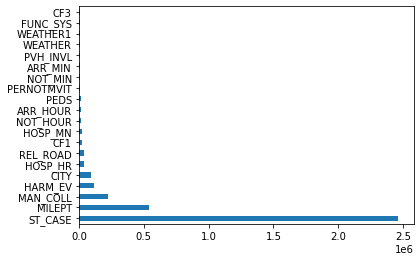

In [118]:
# Find feature scores and pick top 20 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:43]  #independent columns
y = data.iloc[:,-1]    #target column i.e SEVERITY
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Attributes','feature_score']  #naming the dataframe columns
#print(featureScores.nlargest(20,'feature_score'))  #print 20 best features
#featureScores.nlargest(20,'feature_score').plot(kind='barh')
#plt.show()

feat_scores = pd.Series(fit.scores_, index=X.columns)
feat_scores.nlargest(20).plot(kind='barh')
plt.show()

[0.02143301 0.03139784 0.03165511 0.03299837 0.03230096 0.03273844
 0.03142703 0.01141301 0.02501131 0.00214561 0.08980275 0.07537937
 0.03774442 0.02037148 0.01530845 0.01361623 0.01745727 0.01362307
 0.01677851 0.03510086 0.04026649 0.00084636 0.01400897 0.00187224
 0.00072963 0.02988687 0.01356955 0.03105284 0.02490813 0.02475767
 0.02616791 0.0315547  0.03119907 0.00450346 0.01839157 0.01538876
 0.00361583 0.0151713  0.00218531 0.01800081 0.02592063 0.01356832
 0.02473047]


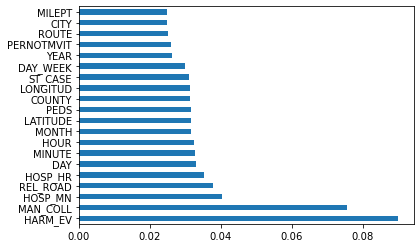

In [73]:
# Calculate feature importance - pick Top 20 features
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

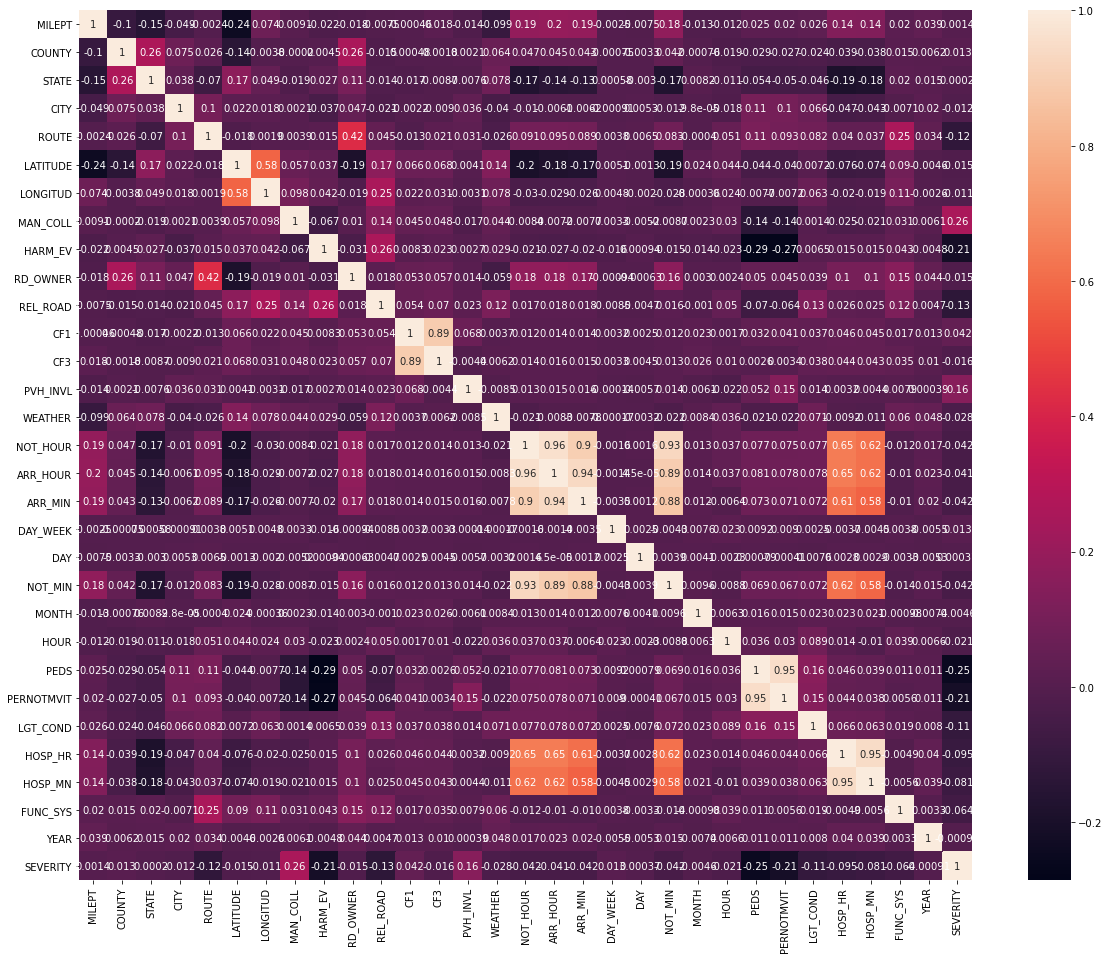

In [74]:
#Correlation Matrix
df = pd.DataFrame(data, columns= ['MILEPT','COUNTY','STATE', 'CITY','ROUTE','LATITUDE','LONGITUD',
                  'MAN_COLL','HARM_EV','RD_OWNER','REL_ROAD','CF1','CF3','PVH_INVL','WEATHER',
                  'NOT_HOUR','ARR_HOUR','ARR_MIN','DAY_WEEK','DAY','NOT_MIN','MONTH','HOUR',
                  'PEDS','PERNOTMVIT','HOSP_HR','HOSP_MN','FUNC_SYS','YEAR','SEVERITY'])
corrmax = df.corr()

f, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corrmax, annot = True)
plt.show()

In [75]:
# Prepare Models - Train/Test data preparation
from sklearn.model_selection import train_test_split

x = data[['MILEPT','COUNTY','STATE', 'CITY','ROUTE','LATITUDE','LONGITUD',
                  'MAN_COLL','HARM_EV','RD_OWNER','REL_ROAD','CF1','CF3','PVH_INVL','WEATHER',
                  'NOT_HOUR','ARR_HOUR','ARR_MIN','DAY_WEEK','DAY','NOT_MIN','MONTH','HOUR',
                  'PEDS','PERNOTMVIT','HOSP_HR','HOSP_MN','FUNC_SYS','YEAR']]
y = data['SEVERITY']

x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)


In [76]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression().fit(x_train, y_train)

# Value of R-Square
lr_r_square = lr_model.score(x_train, y_train)
print("R-square on Train data : ", lr_r_square)

# Intercept of Linear Regression line
lr_intercept = lr_model.intercept_
print("Intercept value : ", lr_intercept)

# Coefficients in Linear Regression equation
lr_coefficient = lr_model.coef_
print("Coefficients : ", lr_coefficient)

#####################################
##### Run Predictions & Evaluate
#####################################

lr_predictions_y = lr_model.predict(x_test)

# Value of R-Square on test data
lr_r_square_test = lr_model.score(x_test, y_test)
print("R-square on Test data : ", lr_r_square_test)

# Model Evaluation
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, lr_predictions_y))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, lr_predictions_y))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, lr_predictions_y)))



R-square on Train data :  0.2570496630803647
Intercept value :  -4.224901345294596
Coefficients :  [ 8.89066770e-08 -3.21196701e-05 -1.12412903e-03  1.16167594e-06
 -3.25208821e-02 -9.12988941e-04  1.98559001e-03  2.97561599e-02
 -1.32640888e-02  7.07400298e-04 -1.77430615e-02  1.66472969e-02
 -1.70725052e-02  4.16775984e-01 -5.74547178e-04  1.82095327e-04
  8.83689079e-04 -2.33733615e-04  3.68354027e-03  3.93971759e-04
 -2.27130391e-04 -1.96293034e-04 -2.33811057e-04 -5.99809733e-01
  1.25691175e-01 -3.50302039e-03  1.71900630e-03 -2.70821462e-03
  3.25071351e-03]
R-square on Test data :  0.26210976635847727
Mean Absolute Error :  0.5253560135374438
Mean Squared Error :  0.42225876360943987
Root Mean Squared Error :  0.6498144070497667


Output classes :  [1 2 3]
Intercept :  [-1.41101869e-04  7.30646048e-06 -6.69670335e-06]
Coefficients :  [[-1.97944092e-07  1.93727161e-04  3.28399381e-03 -1.48915955e-06
   1.39447431e-01  2.24032531e-03 -1.34406696e-03 -9.51218878e-01
   1.67513017e-02 -2.87666844e-03  1.42787121e-01 -5.01485433e-02
   5.35145965e-02 -1.68664522e+00  2.34751010e-03 -1.87249890e-03
  -1.31402197e-03 -1.63972407e-04  1.99301483e-03 -6.19821887e-04
   1.50191102e-03 -5.82017152e-05  3.54089222e-03  8.22925370e-01
   2.04589747e-01  1.40196039e-02 -7.63349723e-03 -1.12880338e-03
  -7.72545301e-04]
 [ 6.76935896e-07 -3.98752222e-05 -8.49222834e-04 -6.00148574e-06
  -2.42545340e-02  3.20064457e-03 -5.46820157e-05  8.44365178e-02
  -1.54044592e-02  8.75851393e-04 -7.71831368e-02 -5.61518656e-04
  -1.22280367e-03  8.06761490e-03 -5.53991881e-04  7.75579296e-04
  -7.72572536e-04  7.49524641e-04 -2.28729001e-03 -5.35267736e-04
  -1.87549031e-04 -2.91767549e-03 -6.79259678e-03 -2.64652529e-01
  -2.51982079e-01 

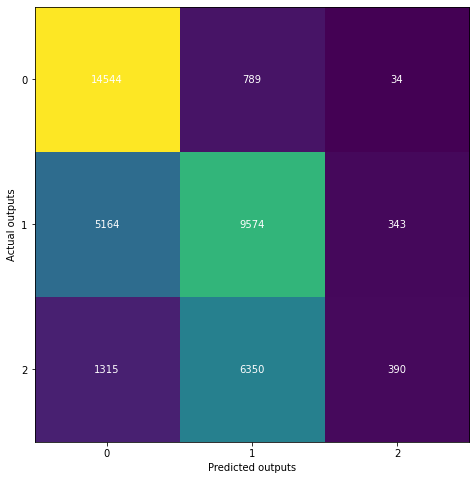

In [78]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
logistic_model.fit(x_train, y_train)

print("Output classes : ", logistic_model.classes_)
print("Intercept : ", logistic_model.intercept_)
print("Coefficients : ", logistic_model.coef_)

y_pred = logistic_model.predict(x_test)

print("Score on entire data : ", logistic_model.score(x, y))
print("Score on Train data : ", logistic_model.score(x_train, y_train))
print("Score on Test data : ", logistic_model.score(x_test, y_test))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

F:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Score on entire data :  0.404708229011916
Score on Train data :  0.4053281908435112
Score on Test data :  0.4022283977871854
              precision    recall  f1-score   support

           1       0.40      1.00      0.57     15367
           2       0.55      0.00      0.01     15081
           3       0.73      0.01      0.02      8055

    accuracy                           0.40     38503
   macro avg       0.56      0.34      0.20     38503
weighted avg       0.53      0.40      0.24     38503



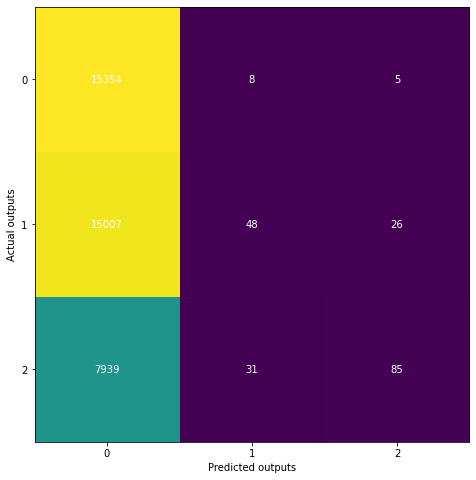

In [79]:
# SVM - Support Vector machine
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

print("Score on entire data : ", svc_model.score(x, y))
print("Score on Train data : ", svc_model.score(x_train, y_train))
print("Score on Test data : ", svc_model.score(x_test, y_test))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Score on entire data :  0.5241800596320267
Score on Train data :  0.5245014966463435
Score on Test data :  0.5228943199231229
              precision    recall  f1-score   support

           1       0.67      0.62      0.64     15367
           2       0.45      0.48      0.47     15081
           3       0.41      0.42      0.42      8055

    accuracy                           0.52     38503
   macro avg       0.51      0.51      0.51     38503
weighted avg       0.53      0.52      0.53     38503



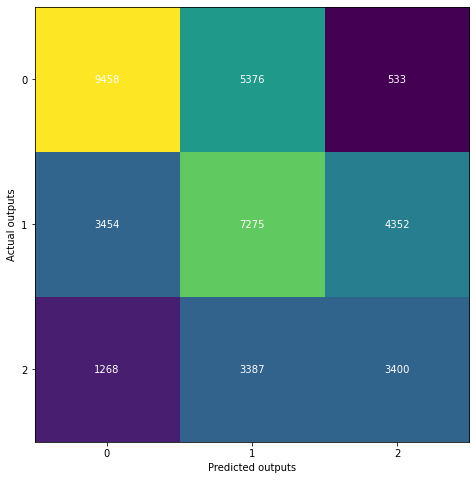

In [80]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_pred = NB_model.predict(x_test)

print("Score on entire data : ", NB_model.score(x, y))
print("Score on Train data : ", NB_model.score(x_train, y_train))
print("Score on Test data : ", NB_model.score(x_test, y_test))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [101]:
# Neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(x_train, y_train)
print('Test Accuracy: %.2f' % (accuracy*100))

# make probability predictions with the model
predictions = model.predict(x_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]

# make class predictions with the model
predictions = model.predict_classes(x_test)


ModuleNotFoundError: No module named 'keras'

In [89]:
# Plot accuracy comparisons between scenario 1(assumed features) & scenario 2(features from analysis)
plot_data = pd.read_excel (r'C:\Users\Life\Desktop\GMU\CS-504\dataset\AccuracyResults.xlsx')

plot_data

,Model,accuracy_scenario_1,accuracy_scenario_2,Unnamed: 3,Metric,scenario_1,scenario_2
0,Logistic Regression,0.4374,0.6365,NaN,MAE,0.6377,0.5253
1,SVM,0.4075,0.4022,NaN,MSE,0.5647,0.4222
2,Naïve Bayes,0.4174,0.5228,NaN,RMSE,0.7515,0.6498


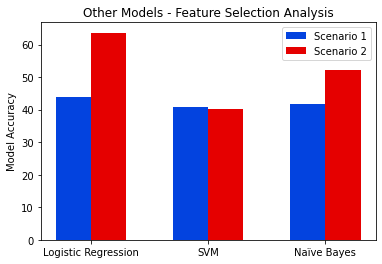

In [98]:
# Plot accuracy comparisons between scenario 1(assumed features) & scenario 2(features from analysis)
# Logistic Regression, SVM, Naive Bayes
plot_data = pd.read_excel (r'C:\Users\Life\Desktop\GMU\CS-504\dataset\AccuracyResults.xlsx')

# Initialise a figure. subplots() with no args gives one plot.
fig, ax = plt.subplots()

# data preparation
models = plot_data['Model']
x = np.arange(len(models))

# Plot 
ax.bar(x - 0.3/2, 100*plot_data['accuracy_scenario_1'], 0.3, label='Scenario 1', color='#0343df')
ax.bar(x + 0.3/2, 100*plot_data['accuracy_scenario_2'], 0.3, label='Scenario 2', color='#e50000')

# Customise some display properties
ax.set_ylabel('Model Accuracy')
ax.set_title('Other Models - Feature Selection Analysis')
ax.set_xticks(x)  
ax.set_xticklabels(models.astype(str).values, rotation='horizontal')
ax.legend()

# show the plot
plt.show()

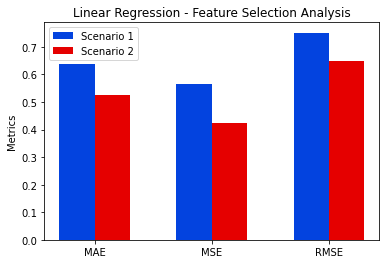

In [100]:
# Plot accuracy comparisons between scenario 1(assumed features) & scenario 2(features from analysis)
# Linear Regression
plot_data = pd.read_excel (r'C:\Users\Life\Desktop\GMU\CS-504\dataset\AccuracyResults.xlsx')

# Initialise a figure. subplots() with no args gives one plot.
fig, ax = plt.subplots()

# data preparation
models = plot_data['Metric']
x = np.arange(len(models))

# Plot 
ax.bar(x - 0.3/2, plot_data['scenario_1'], 0.3, label='Scenario 1', color='#0343df')
ax.bar(x + 0.3/2, plot_data['scenario_2'], 0.3, label='Scenario 2', color='#e50000')

# Customise some display properties
ax.set_ylabel('Metrics')
ax.set_title('Linear Regression - Feature Selection Analysis')
ax.set_xticks(x)  
ax.set_xticklabels(models.astype(str).values, rotation='horizontal')
ax.legend()

# show the plot
plt.show()